##### Last try - Elias

# Set Up

In [1]:
# Installing the Packages

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting the Seed (pandas, statsmodels, matplotlib and y_data_profiling rely on numpy's random generator, and thus, we need to set the seed in numpy)
seed = 2024
np.random.seed(seed)

# Set the display format for floats
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

In [3]:
# Importing the data 
diet_df = pd.read_csv("diet.csv")
recipes_df = pd.read_csv("recipes.csv")
requests_df = pd.read_csv("requests.csv")
reviews_df = pd.read_csv("reviews.csv")

/var/folders/_4/9t_lhqh15ps7xbdf5qrr2sg40000gn/T/ipykernel_88373/1271822651.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.read_csv("reviews.csv")


### Cleaning Diet

In [4]:
diet_df

,AuthorId,Diet,Age
0,10000120E,Vegetarian,46
1,1000014D,Vegan,18
2,1000015A,Vegetarian,58
3,1000016E,Vegetarian,32
4,1000027E,Vegan,61
...,...,...,...
271902,999917E,Vegetarian,28
271903,999936C,Omnivore,22
271904,99993D,Vegetarian,58
271905,99994A,Vegetarian,18


In [5]:
# Clean Diet
diet_cleaned = diet_df 

# Replace the missing values with the most common diet
diet_cleaned.loc[diet_df["AuthorId"] == "646062A", "Diet"] = "Vegetarian"

# Dummy Encode the diet column with 0s and 1s
diet_cleaned = pd.get_dummies(diet_cleaned, columns=["Diet"], prefix=["Diet"])

diet_cleaned

,AuthorId,Age,Diet_Omnivore,Diet_Vegan,Diet_Vegetarian
0,10000120E,46,False,False,True
1,1000014D,18,False,True,False
2,1000015A,58,False,False,True
3,1000016E,32,False,False,True
4,1000027E,61,False,True,False
...,...,...,...,...,...
271902,999917E,28,False,False,True
271903,999936C,22,True,False,False
271904,99993D,58,False,False,True
271905,99994A,18,False,False,True


# Cleaning Recipes

In [6]:
recipes_df

,RecipeId,Name,CookTime,PrepTime,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield
0,73440,Bow Ties With Broccoli Pesto,0,1800,Other,"c(""\""6\"""", ""\""2\"""", ""\""1 1/2\"""", ""\""1/4\"""", ""\...","c(""\""hazelnuts\"""", ""\""broccoli florets\"""", ""\""...",241.30,10.10,1.20,0.00,13.10,31.80,2.30,1.40,6.70,9.00,NaN
1,365718,Cashew-chutney Rice,3600,600,Other,"c(""\""1\"""", ""\""3/4\"""", ""\""6\"""", ""\""5\"""", ""\""2\""...","c(""\""celery\"""", ""\""onion\"""", ""\""butter\"""", ""\""...",370.80,17.50,7.20,22.90,553.30,44.30,1.60,2.20,9.40,8.00,NaN
2,141757,Copycat Taco Bell Nacho Fries BellGrande,3600,2700,Other,"c(""\""3\"""", ""\""1/2\"""", ""\""1\"""", ""\""1\"""", ""\""3\""...","c(""\""Copycat Taco Bell Seasoned Beef\"""", ""\""ye...",377.60,20.90,10.50,45.70,1501.80,36.60,3.80,6.10,12.90,8.00,NaN
3,280351,Slow Cooker Jalapeno Cheddar Cheese Soup,18000,1800,Other,"c(""\""2\"""", ""\""1\"""", ""\""2\"""", ""\""2\"""", ""\""1\"""",...","c(""\""unsalted butter\"""", ""\""yellow onion\"""", ""...",282.80,16.50,10.30,50.50,630.20,22.80,2.30,2.70,11.70,6.00,NaN
4,180505,Cool & Crisp Citrus Chiffon Pie,3600,1800,Other,"c(""\""1\"""", ""\""1/4\"""", ""\""1/2\"""", ""\""1/2\"""", ""\...","c(""\""unflavored gelatin\"""", ""\""water\"""", ""\""su...",257.50,8.60,2.40,110.70,160.90,39.80,0.40,30.20,6.30,6.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75599,253577,Frijoles Negros- Crock Pot Mexican Black Beans,43200,28800,Other,"c(""\""2\"""", ""\""6 -8\"""", ""\""5\"""", ""\""1/2\"""", ""\""...","c(""\""black beans\"""", ""\""water\"""", ""\""bay leave...",121.50,0.50,0.10,0.00,1175.10,22.20,7.80,0.60,7.90,NaN,NaN
75600,267827,Moose Moussaka,3600,2700,Other,"c(""\""1\"""", ""\""6\"""", ""\""2\"""", ""\""2\"""", ""\""1/2\""...","c(""\""onion\"""", ""\""garlic cloves\"""", ""\""olive o...",652.20,25.80,10.70,197.90,435.50,51.90,7.50,7.20,50.10,NaN,NaN
75601,266983,Cantonese Pepper Steak for Two (Or More),1800,900,Other,"c(""\""1/2\"""", ""\""1\"""", ""\""1/8\"""", ""\""1/8\"""", ""\...","c(""\""top round steak\"""", ""\""cornstarch\"""", ""\""...",223.90,9.20,3.60,78.30,725.90,7.30,1.10,1.70,26.70,2.00,NaN
75602,253739,Coconut Cream Cooler,300,120,Other,"c(""\""1\"""", ""\""1\"""", ""\""1\"""", ""\""7 1/2\"""", ""\""1...","c(""\""cream of coconut\"""", ""\""water\"""")",2229.80,80.30,69.30,0.00,294.70,369.00,15.70,317.90,26.70,NaN,1 gallon


#### PrepTime and CookTime
 ≈ TotalTime = 0 --> replace with median of matching RecipeCategory (ca. 400 rows)
 > 18.000 TotalTime --> replace with 18.000
 
drop PrepTime, CookTime, TotalTime

,RecipeId,Name,CookTime,PrepTime,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,TotalTime
0,73440,Bow Ties With Broccoli Pesto,0,1800,Other,"c(""\""6\"""", ""\""2\"""", ""\""1 1/2\"""", ""\""1/4\"""", ""\...","c(""\""hazelnuts\"""", ""\""broccoli florets\"""", ""\""...",241.30,10.10,1.20,0.00,13.10,31.80,2.30,1.40,6.70,9.00,NaN,1800
1,365718,Cashew-chutney Rice,3600,600,Other,"c(""\""1\"""", ""\""3/4\"""", ""\""6\"""", ""\""5\"""", ""\""2\""...","c(""\""celery\"""", ""\""onion\"""", ""\""butter\"""", ""\""...",370.80,17.50,7.20,22.90,553.30,44.30,1.60,2.20,9.40,8.00,NaN,4200
2,141757,Copycat Taco Bell Nacho Fries BellGrande,3600,2700,Other,"c(""\""3\"""", ""\""1/2\"""", ""\""1\"""", ""\""1\"""", ""\""3\""...","c(""\""Copycat Taco Bell Seasoned Beef\"""", ""\""ye...",377.60,20.90,10.50,45.70,1501.80,36.60,3.80,6.10,12.90,8.00,NaN,6300
3,280351,Slow Cooker Jalapeno Cheddar Cheese Soup,18000,1800,Other,"c(""\""2\"""", ""\""1\"""", ""\""2\"""", ""\""2\"""", ""\""1\"""",...","c(""\""unsalted butter\"""", ""\""yellow onion\"""", ""...",282.80,16.50,10.30,50.50,630.20,22.80,2.30,2.70,11.70,6.00,NaN,18000
4,180505,Cool & Crisp Citrus Chiffon Pie,3600,1800,Other,"c(""\""1\"""", ""\""1/4\"""", ""\""1/2\"""", ""\""1/2\"""", ""\...","c(""\""unflavored gelatin\"""", ""\""water\"""", ""\""su...",257.50,8.60,2.40,110.70,160.90,39.80,0.40,30.20,6.30,6.00,NaN,5400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75599,253577,Frijoles Negros- Crock Pot Mexican Black Beans,43200,28800,Other,"c(""\""2\"""", ""\""6 -8\"""", ""\""5\"""", ""\""1/2\"""", ""\""...","c(""\""black beans\"""", ""\""water\"""", ""\""bay leave...",121.50,0.50,0.10,0.00,1175.10,22.20,7.80,0.60,7.90,NaN,NaN,18000
75600,267827,Moose Moussaka,3600,2700,Other,"c(""\""1\"""", ""\""6\"""", ""\""2\"""", ""\""2\"""", ""\""1/2\""...","c(""\""onion\"""", ""\""garlic cloves\"""", ""\""olive o...",652.20,25.80,10.70,197.90,435.50,51.90,7.50,7.20,50.10,NaN,NaN,6300
75601,266983,Cantonese Pepper Steak for Two (Or More),1800,900,Other,"c(""\""1/2\"""", ""\""1\"""", ""\""1/8\"""", ""\""1/8\"""", ""\...","c(""\""top round steak\"""", ""\""cornstarch\"""", ""\""...",223.90,9.20,3.60,78.30,725.90,7.30,1.10,1.70,26.70,2.00,NaN,2700
75602,253739,Coconut Cream Cooler,300,120,Other,"c(""\""1\"""", ""\""1\"""", ""\""1\"""", ""\""7 1/2\"""", ""\""1...","c(""\""cream of coconut\"""", ""\""water\"""")",2229.80,80.30,69.30,0.00,294.70,369.00,15.70,317.90,26.70,NaN,1 gallon,420


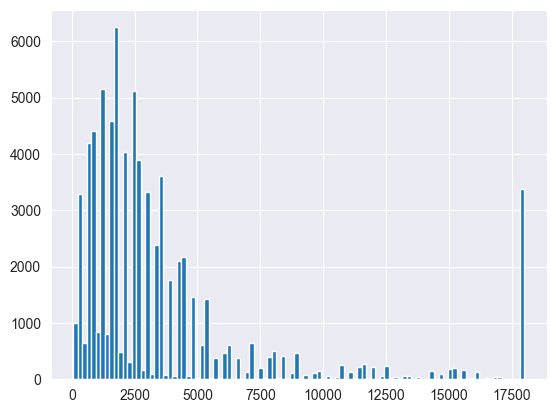

In [7]:
# add cooktime and preptime together to get total time
recipes_df["TotalTime"] = recipes_df["CookTime"] + recipes_df["PrepTime"]

# Replace TotalTime > 18.000 with 18.000
#recipes_df.loc[recipes_df["TotalTime"] > 18000, "TotalTime"] = recipes_df.groupby("RecipeCategory")["TotalTime"].transform(lambda x: x.median())
recipes_df.loc[recipes_df["TotalTime"] > 18000, "TotalTime"] = 18000

# replace Totaltime = 0 with the median of the matching RecipeCategory
recipes_df["TotalTime"] = recipes_df.groupby("RecipeCategory")["TotalTime"].transform(lambda x: x.replace(0, x.median()))

# show distribution of TotalTime
recipes_df["TotalTime"].hist(bins=100)

recipes_df

### RecipeServings & RecipeYield


In [8]:
# visualize the distribution of RecipeServings
recipes_df["RecipeServings"].describe()

# replace RecipeServings > 1000 with 1000
recipes_df.loc[recipes_df["RecipeServings"] > 1000, "RecipeServings"] = 1000
recipes_df
#recipes_df["RecipeServings"].hist(bins=100)

# recipeNew = recipeservings if recipeservings = nAn  else recipeyield
recipes_df["RecipeAmount"] = recipes_df["RecipeServings"].fillna(recipes_df["RecipeYield"])
recipes_df

recipes_df["RecipeAmount"].describe()

# new column with numeric values of recipeyield
recipes_df["RecipeYieldNumeric"] = recipes_df["RecipeYield"].str.extract("(\d+)", expand=False).astype(float)

# new column with numeric value of rows which include "cup" in recipeyield
recipes_df["RecipeYieldCup"] = recipes_df["RecipeYield"].str.extract("(\d+ cup +\d)", expand=False).str.extract("(\d+)", expand=False).astype(float)
recipes_df



,RecipeId,Name,CookTime,PrepTime,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,...,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,TotalTime,RecipeAmount,RecipeYieldNumeric,RecipeYieldCup
0,73440,Bow Ties With Broccoli Pesto,0,1800,Other,"c(""\""6\"""", ""\""2\"""", ""\""1 1/2\"""", ""\""1/4\"""", ""\...","c(""\""hazelnuts\"""", ""\""broccoli florets\"""", ""\""...",241.30,10.10,1.20,...,31.80,2.30,1.40,6.70,9.00,NaN,1800,9.00,NaN,NaN
1,365718,Cashew-chutney Rice,3600,600,Other,"c(""\""1\"""", ""\""3/4\"""", ""\""6\"""", ""\""5\"""", ""\""2\""...","c(""\""celery\"""", ""\""onion\"""", ""\""butter\"""", ""\""...",370.80,17.50,7.20,...,44.30,1.60,2.20,9.40,8.00,NaN,4200,8.00,NaN,NaN
2,141757,Copycat Taco Bell Nacho Fries BellGrande,3600,2700,Other,"c(""\""3\"""", ""\""1/2\"""", ""\""1\"""", ""\""1\"""", ""\""3\""...","c(""\""Copycat Taco Bell Seasoned Beef\"""", ""\""ye...",377.60,20.90,10.50,...,36.60,3.80,6.10,12.90,8.00,NaN,6300,8.00,NaN,NaN
3,280351,Slow Cooker Jalapeno Cheddar Cheese Soup,18000,1800,Other,"c(""\""2\"""", ""\""1\"""", ""\""2\"""", ""\""2\"""", ""\""1\"""",...","c(""\""unsalted butter\"""", ""\""yellow onion\"""", ""...",282.80,16.50,10.30,...,22.80,2.30,2.70,11.70,6.00,NaN,18000,6.00,NaN,NaN
4,180505,Cool & Crisp Citrus Chiffon Pie,3600,1800,Other,"c(""\""1\"""", ""\""1/4\"""", ""\""1/2\"""", ""\""1/2\"""", ""\...","c(""\""unflavored gelatin\"""", ""\""water\"""", ""\""su...",257.50,8.60,2.40,...,39.80,0.40,30.20,6.30,6.00,NaN,5400,6.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75599,253577,Frijoles Negros- Crock Pot Mexican Black Beans,43200,28800,Other,"c(""\""2\"""", ""\""6 -8\"""", ""\""5\"""", ""\""1/2\"""", ""\""...","c(""\""black beans\"""", ""\""water\"""", ""\""bay leave...",121.50,0.50,0.10,...,22.20,7.80,0.60,7.90,NaN,NaN,18000,NaN,NaN,NaN
75600,267827,Moose Moussaka,3600,2700,Other,"c(""\""1\"""", ""\""6\"""", ""\""2\"""", ""\""2\"""", ""\""1/2\""...","c(""\""onion\"""", ""\""garlic cloves\"""", ""\""olive o...",652.20,25.80,10.70,...,51.90,7.50,7.20,50.10,NaN,NaN,6300,NaN,NaN,NaN
75601,266983,Cantonese Pepper Steak for Two (Or More),1800,900,Other,"c(""\""1/2\"""", ""\""1\"""", ""\""1/8\"""", ""\""1/8\"""", ""\...","c(""\""top round steak\"""", ""\""cornstarch\"""", ""\""...",223.90,9.20,3.60,...,7.30,1.10,1.70,26.70,2.00,NaN,2700,2.00,NaN,NaN
75602,253739,Coconut Cream Cooler,300,120,Other,"c(""\""1\"""", ""\""1\"""", ""\""1\"""", ""\""7 1/2\"""", ""\""1...","c(""\""cream of coconut\"""", ""\""water\"""")",2229.80,80.30,69.30,...,369.00,15.70,317.90,26.70,NaN,1 gallon,420,1 gallon,1.00,NaN


In [9]:
# show biggest difference between FatContent and SaturatedFatContent
recipes_df["FatContent"].astype(float) - recipes_df["SaturatedFatContent"].astype(float)

0        8.90
1       10.30
2       10.40
3        6.20
4        6.20
         ... 
75599    0.40
75600   15.10
75601    5.60
75602   11.00
75603    6.90
Length: 75604, dtype: float64

# plot all nutrition columns
recipes_df[["Calories", "FatContent", "SaturatedFatContent", "CholesterolContent", "SodiumContent", "CarbohydrateContent", "FiberContent", "SugarContent", "ProteinContent"]].hist(bins=100, figsize=(20,20))

# handle outliers of nutrition columns
recipes_df.loc[recipes_df["Calories"] > 4000, "Calories"] = recipes_df.groupby("RecipeCategory")["Calories"].transform(lambda x: x.median())
recipes_df.loc[recipes_df["FatContent"] > 200, "FatContent"] = recipes_df.groupby("RecipeCategory")["FatContent"].transform(lambda x: x.median())
recipes_df.loc[recipes_df["SaturatedFatContent"] > 100, "SaturatedFatContent"] = recipes_df.groupby("RecipeCategory")["SaturatedFatContent"].transform(lambda x: x.median())
recipes_df.loc[recipes_df["CholesterolContent"] > 400, "CholesterolContent"] = recipes_df.groupby("RecipeCategory")["CholesterolContent"].transform(lambda x: x.median())
recipes_df.loc[recipes_df["SodiumContent"] > 4000, "SodiumContent"] = recipes_df.groupby("RecipeCategory")["SodiumContent"].transform(lambda x: x.median())
recipes_df.loc[recipes_df["CarbohydrateContent"] > 400, "CarbohydrateContent"] = recipes_df.groupby("RecipeCategory")["CarbohydrateContent"].transform(lambda x: x.median())
recipes_df.loc[recipes_df["FiberContent"] > 50, "FiberContent"] = recipes_df.groupby("RecipeCategory")["FiberContent"].transform(lambda x: x.median())
recipes_df.loc[recipes_df["SugarContent"] > 100, "SugarContent"] = recipes_df.groupby("RecipeCategory")["SugarContent"].transform(lambda x: x.median())
recipes_df.loc[recipes_df["ProteinContent"] > 100, "ProteinContent"] = recipes_df.groupby("RecipeCategory")["ProteinContent"].transform(lambda x: x.median())


In [10]:
# how much rows are 0 in the nutrition columns?
recipes_df[["Calories", "FatContent", "SaturatedFatContent", "CholesterolContent", "SodiumContent", "CarbohydrateContent", "FiberContent", "SugarContent", "ProteinContent"]].eq(0).sum()


Calories                 416
FatContent              1609
SaturatedFatContent     3980
CholesterolContent     15968
SodiumContent            420
CarbohydrateContent      800
FiberContent            3807
SugarContent            1619
ProteinContent          1186
dtype: int64

<Axes: ylabel='difference'>

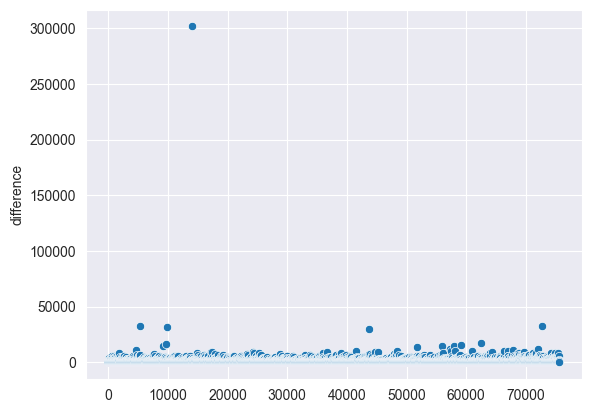

In [11]:
# sodiumContent and CholesterolContent / 1000
recipes_df["SodiumContent"] = recipes_df["SodiumContent"] / 1000
recipes_df["CholesterolContent"] = recipes_df["CholesterolContent"] / 1000

# sum of all nutrition columns (without calories, saturatedfatcontent)
recipes_df["NutritionSum"] = recipes_df["FatContent"] + recipes_df["CholesterolContent"] + recipes_df["SodiumContent"] + recipes_df["CarbohydrateContent"] + recipes_df["FiberContent"] + recipes_df["SugarContent"] + recipes_df["ProteinContent"]

# calories / nutritionsum
recipes_df["CaloriesPerNutrition"] = recipes_df["Calories"] / recipes_df["NutritionSum"]
recipes_df

# get rid of extreme values in calories and nutritionsum
#recipes_df.loc[recipes_df["Calories"] > 5000, "Calories"] = 5000
#recipes_df.loc[recipes_df["NutritionSum"] > 2000, "NutritionSum"] = 2000

# plot calories against nutritionsum
#recipes_df.plot.scatter(x="Calories", y="NutritionSum")

# difference of calories and nutrition sum
recipes_df["difference"] = recipes_df["Calories"] - recipes_df["NutritionSum"]
recipes_df["difference"].describe()
recipes_df

sns.scatterplot(recipes_df["difference"])

# 


In [13]:
recipes_df

# plot differen



,RecipeId,Name,CookTime,PrepTime,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,...,ProteinContent,RecipeServings,RecipeYield,TotalTime,RecipeAmount,RecipeYieldNumeric,RecipeYieldCup,NutritionSum,CaloriesPerNutrition,difference
0,73440,Bow Ties With Broccoli Pesto,0,1800,Other,"c(""\""6\"""", ""\""2\"""", ""\""1 1/2\"""", ""\""1/4\"""", ""\...","c(""\""hazelnuts\"""", ""\""broccoli florets\"""", ""\""...",241.30,10.10,1.20,...,6.70,9.00,NaN,1800,9.00,NaN,NaN,52.31,4.61,188.99
1,365718,Cashew-chutney Rice,3600,600,Other,"c(""\""1\"""", ""\""3/4\"""", ""\""6\"""", ""\""5\"""", ""\""2\""...","c(""\""celery\"""", ""\""onion\"""", ""\""butter\"""", ""\""...",370.80,17.50,7.20,...,9.40,8.00,NaN,4200,8.00,NaN,NaN,75.58,4.91,295.22
2,141757,Copycat Taco Bell Nacho Fries BellGrande,3600,2700,Other,"c(""\""3\"""", ""\""1/2\"""", ""\""1\"""", ""\""1\"""", ""\""3\""...","c(""\""Copycat Taco Bell Seasoned Beef\"""", ""\""ye...",377.60,20.90,10.50,...,12.90,8.00,NaN,6300,8.00,NaN,NaN,81.85,4.61,295.75
3,280351,Slow Cooker Jalapeno Cheddar Cheese Soup,18000,1800,Other,"c(""\""2\"""", ""\""1\"""", ""\""2\"""", ""\""2\"""", ""\""1\"""",...","c(""\""unsalted butter\"""", ""\""yellow onion\"""", ""...",282.80,16.50,10.30,...,11.70,6.00,NaN,18000,6.00,NaN,NaN,56.68,4.99,226.12
4,180505,Cool & Crisp Citrus Chiffon Pie,3600,1800,Other,"c(""\""1\"""", ""\""1/4\"""", ""\""1/2\"""", ""\""1/2\"""", ""\...","c(""\""unflavored gelatin\"""", ""\""water\"""", ""\""su...",257.50,8.60,2.40,...,6.30,6.00,NaN,5400,6.00,NaN,NaN,85.57,3.01,171.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75599,253577,Frijoles Negros- Crock Pot Mexican Black Beans,43200,28800,Other,"c(""\""2\"""", ""\""6 -8\"""", ""\""5\"""", ""\""1/2\"""", ""\""...","c(""\""black beans\"""", ""\""water\"""", ""\""bay leave...",121.50,0.50,0.10,...,7.90,NaN,NaN,18000,NaN,NaN,NaN,40.18,3.02,81.32
75600,267827,Moose Moussaka,3600,2700,Other,"c(""\""1\"""", ""\""6\"""", ""\""2\"""", ""\""2\"""", ""\""1/2\""...","c(""\""onion\"""", ""\""garlic cloves\"""", ""\""olive o...",652.20,25.80,10.70,...,50.10,NaN,NaN,6300,NaN,NaN,NaN,143.13,4.56,509.07
75601,266983,Cantonese Pepper Steak for Two (Or More),1800,900,Other,"c(""\""1/2\"""", ""\""1\"""", ""\""1/8\"""", ""\""1/8\"""", ""\...","c(""\""top round steak\"""", ""\""cornstarch\"""", ""\""...",223.90,9.20,3.60,...,26.70,2.00,NaN,2700,2.00,NaN,NaN,46.80,4.78,177.10
75602,253739,Coconut Cream Cooler,300,120,Other,"c(""\""1\"""", ""\""1\"""", ""\""1\"""", ""\""7 1/2\"""", ""\""1...","c(""\""cream of coconut\"""", ""\""water\"""")",2229.80,80.30,69.30,...,26.70,NaN,1 gallon,420,1 gallon,1.00,NaN,809.89,2.75,1419.91


recipes_df.loc[recipes_df["Calories"] > 4000, "Calories"] = 4000
recipes_df.loc[recipes_df["FatContent"] > 200, "FatContent"] = 200
recipes_df.loc[recipes_df["SaturatedFatContent"] > 100, "SaturatedFatContent"] = 100
recipes_df.loc[recipes_df["CholesterolContent"] > 800, "CholesterolContent"] = 800
recipes_df.loc[recipes_df["SodiumContent"] > 5000, "SodiumContent"] = 5000
recipes_df.loc[recipes_df["CarbohydrateContent"] > 500, "CarbohydrateContent"] = 500
recipes_df.loc[recipes_df["FiberContent"] > 40, "FiberContent"] = 40
recipes_df.loc[recipes_df["SugarContent"] > 150, "SugarContent"] = 150
recipes_df.loc[recipes_df["ProteinContent"] > 100, "ProteinContent"] = 100

# drop 0 values in nutrition columns
recipes_df = recipes_df[recipes_df["Calories"] != 0]
recipes_df = recipes_df[recipes_df["FatContent"] != 0]
recipes_df = recipes_df[recipes_df["SaturatedFatContent"] != 0]
recipes_df = recipes_df[recipes_df["CholesterolContent"] != 0]
recipes_df = recipes_df[recipes_df["SodiumContent"] != 0]
recipes_df = recipes_df[recipes_df["CarbohydrateContent"] != 0]
recipes_df = recipes_df[recipes_df["FiberContent"] != 0]
recipes_df = recipes_df[recipes_df["SugarContent"] != 0]
recipes_df = recipes_df[recipes_df["ProteinContent"] != 0]


array([[<Axes: title={'center': 'Calories'}>,
        <Axes: title={'center': 'FatContent'}>,
        <Axes: title={'center': 'SaturatedFatContent'}>],
       [<Axes: title={'center': 'CholesterolContent'}>,
        <Axes: title={'center': 'SodiumContent'}>,
        <Axes: title={'center': 'CarbohydrateContent'}>],
       [<Axes: title={'center': 'FiberContent'}>,
        <Axes: title={'center': 'SugarContent'}>,
        <Axes: title={'center': 'ProteinContent'}>]], dtype=object)

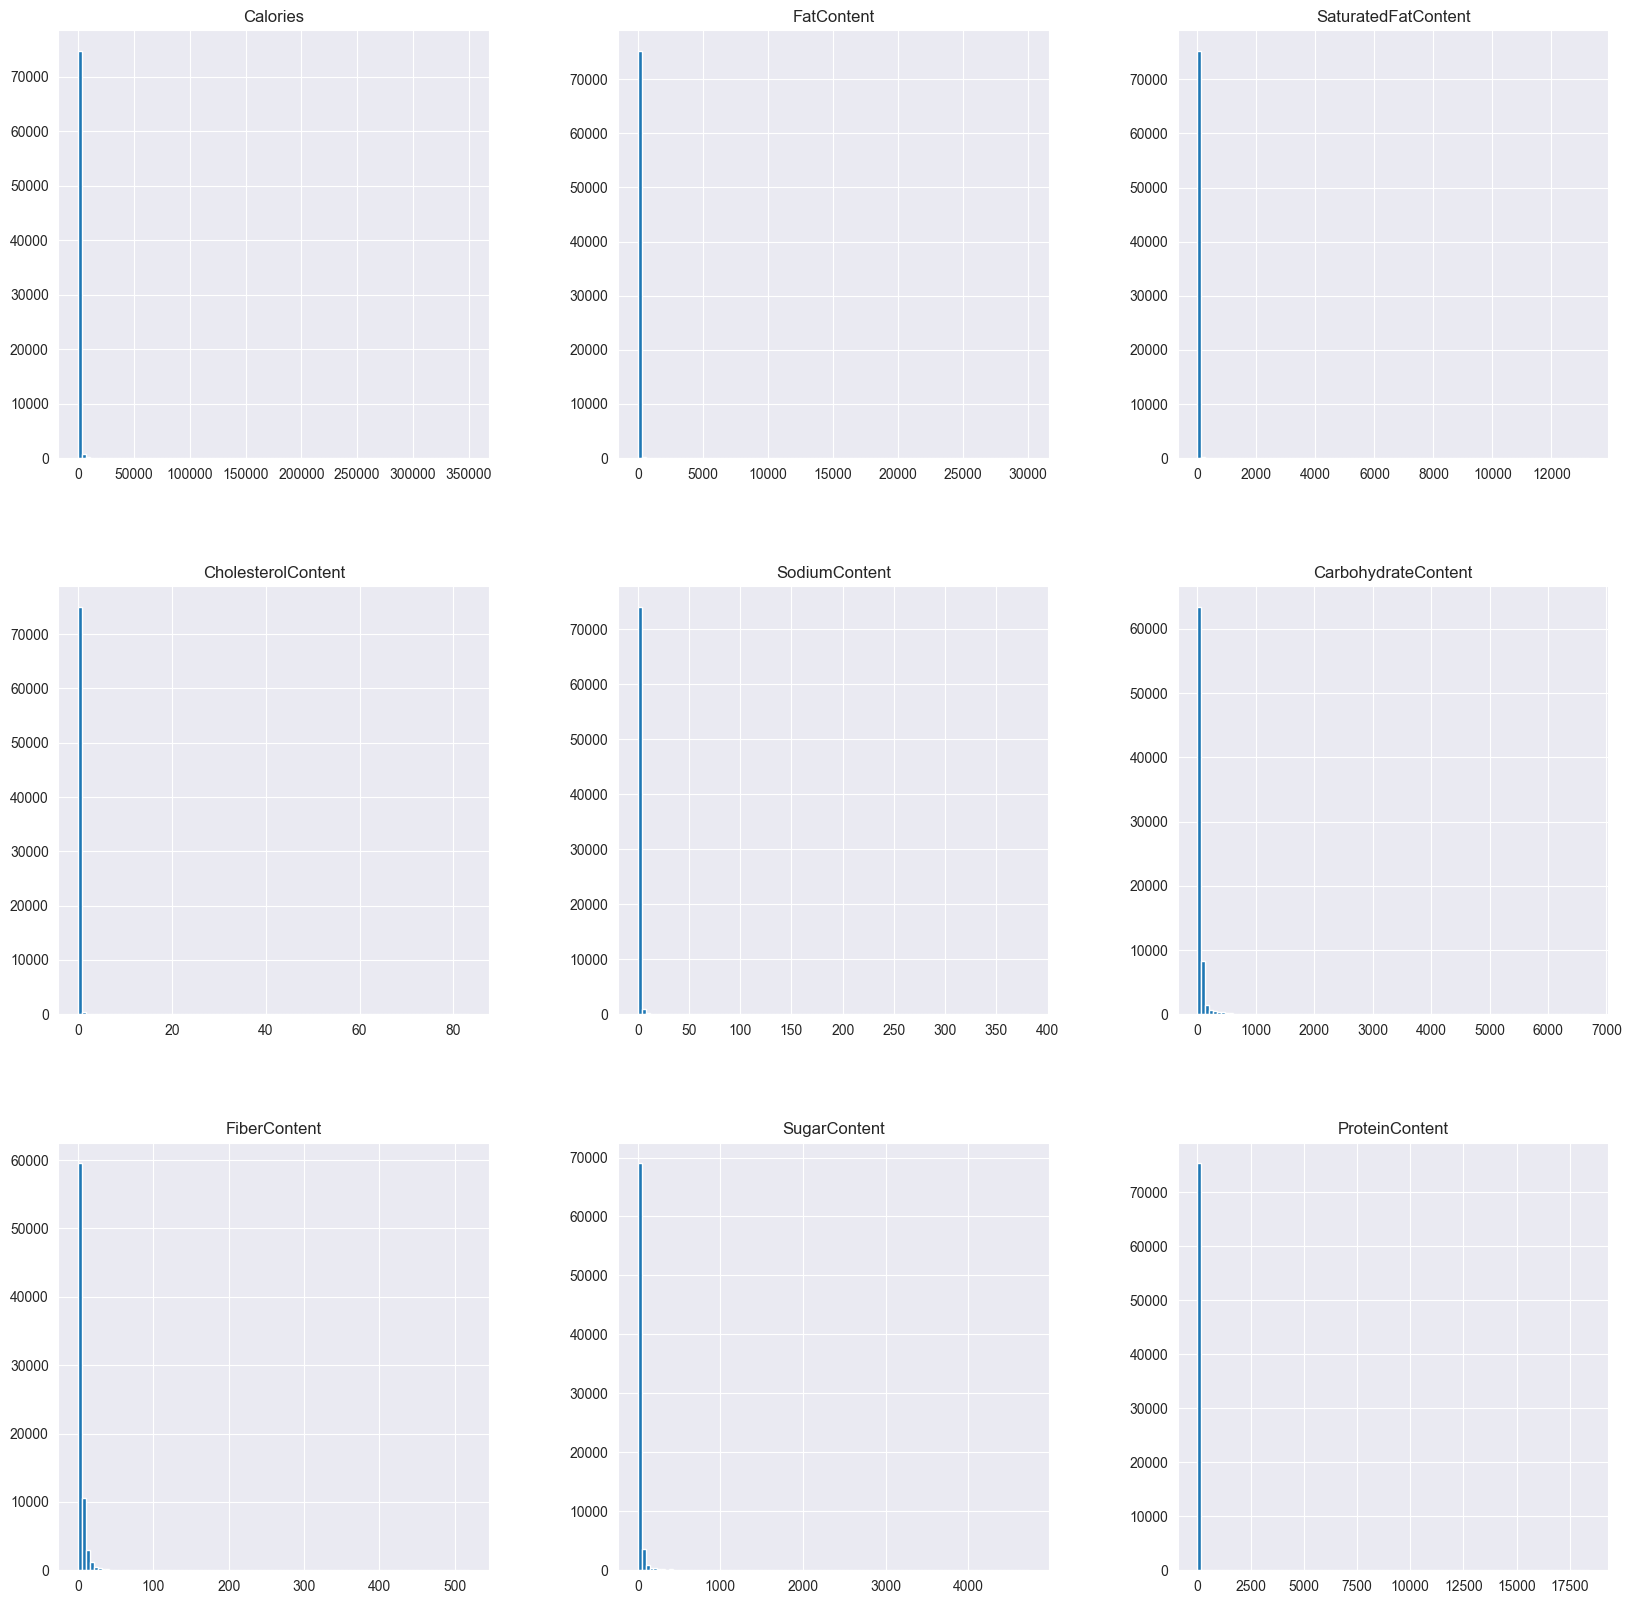

In [12]:
recipes_df[["Calories", "FatContent", "SaturatedFatContent", "CholesterolContent", "SodiumContent", "CarbohydrateContent", "FiberContent", "SugarContent", "ProteinContent"]].hist(bins=100, figsize=(20,20))